# Libraries

Import libararies to implement the described machine learning methods using a few different `sklearn` algorithms.

In [8]:
# Load data
initial_data = pd.read_csv('UNSW_NB15_training.csv')

In [9]:
# Look at the first 5 rows
initial_data.head(n=5)

dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0  0.000011      2      0     496       0   90909.0902   254     0   
1  0.000008      2      0    1762       0  125000.0003   254     0   
2  0.000005      2      0    1068       0  200000.0051   254     0   
3  0.000006      2      0     900       0  166666.6608   254     0   
4  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  dload  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0  180363632.0    0.0  ...                 1               2             0   
1  881000000.0    0.0  ...                 1               2             0   
2  854400000.0    0.0  ...                 1               3             0   
3  600000000.0    0.0  ...                 1               3             0   
4  850400000.0    0.0  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  

[5 rows x 41 columns]

In [10]:
# information of the data: 583 data points, 10 features' columns and 1 target column
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   spkts              82332 non-null  int64  
 2   dpkts              82332 non-null  int64  
 3   sbytes             82332 non-null  int64  
 4   dbytes             82332 non-null  int64  
 5   rate               82332 non-null  float64
 6   sttl               82332 non-null  int64  
 7   dttl               82332 non-null  int64  
 8   sload              82332 non-null  float64
 9   dload              82332 non-null  float64
 10  sloss              82332 non-null  int64  
 11  dloss              82332 non-null  int64  
 12  sinpkt             82332 non-null  float64
 13  dinpkt             82332 non-null  float64
 14  sjit               82332 non-null  float64
 15  djit               82332 non-null  float64
 16  swin               823

## Tidy Data

### Check missing values
First, we should check if there are missing values in the dataset. We could see that four patients do not have the value of `Albumin_and_Globulin_Ratio`.

In [11]:
# check if there are Null values
initial_data.isnull().sum()

dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. Actually, there exists some strategies to impute missing values (see [here](https://scikit-learn.org/stable/modules/impute.html)). For simplicity, we will discard the four rows with missing values. 

In [12]:
# Discard the rows with missing values
data_to_use = initial_data.dropna()

# Shape of the data: we could see that the number of rows remains the same as no null values were reported
data_to_use.shape

(82332, 41)

### Check imbalanced issue on y

First, we get the `X` and `y1` and `y2` .

In [13]:
X = data_to_use.drop(axis=1, columns=['attack_cat']) # X is a dataframe
X = X.drop(axis=1, columns=['label'])


y1 = data_to_use['attack_cat'].values # y is an array
y2 = data_to_use['label'].values

In [14]:
# Calculate Y2 ratio
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

The class ratio for the original data: 1.2:1 (677/583)


C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


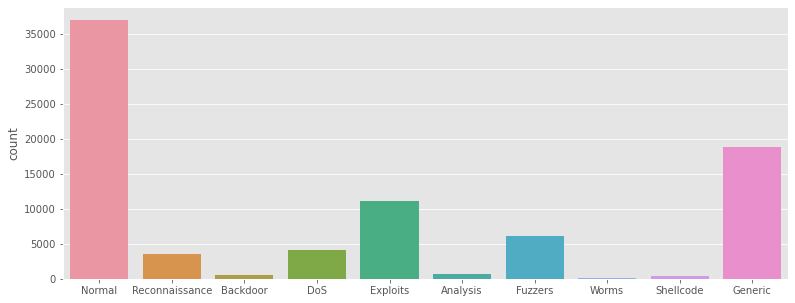

The class ratio for the original data: 0.8:1 (37000/45332)


C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


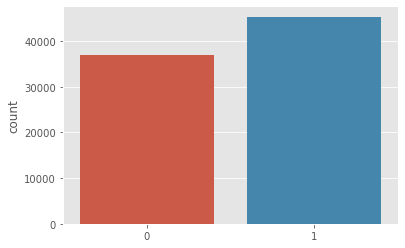

In [15]:
print('The class ratio for the original data:', data_ratio(y1))
plt.figure(figsize=(13,5))
sns.countplot(y1,label="Sum")
plt.show()

print('The class ratio for the original data:', data_ratio(y2))
sns.countplot(y2,label="Sum")
plt.show()

We could see that the dataset is not perfectly balanced. There are some sampling techniques to deal with this issue. Here, we ignore this issue because we are aimed to implement several ML models to compare their performance. 

In [18]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
#print('The class ratio in training data: ', data_ratio(y_train))
#print('The class ratio in testing data: ', data_ratio(y_test))

In [20]:
# Load data
test_data = pd.read_csv('UNSW_NB15_testing.csv')
X_test = test_data.drop(axis=1, columns=['attack_cat']) # X_test is a dataframe
X_test = X_test.drop(axis=1, columns=['label'])


y1_test = test_data['attack_cat'].values # y is an array
y2_test = test_data['label'].values

We will convert the orginal training data to the datframes called X_train, y1_train, y2_train

In [21]:
X_train = X
y1_train = y1
y2_train = y2

In [22]:
# determine categorical and numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [23]:
numerical_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [24]:
categorical_cols

Index([], dtype='object')

Then, we construct the `ColumnTransformer` object, and then fit it on training data.

In [25]:
# define the transformation methods for the columns
t = [('ohe', OneHotEncoder(drop='first'), categorical_cols),
    ('scale', StandardScaler(), numerical_cols)]

col_trans = ColumnTransformer(transformers=t)

# fit the transformation on training data
col_trans.fit(X_train)

ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                 Index([], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object'))])

In [26]:
X_train_transform = col_trans.transform(X_train)

In [27]:
# apply transformation to both training and testing data 
# fit the transformation on training data

In [28]:
X_test_transform = col_trans.transform(X_test)

We could look at the transformed training data. It becomes an array-like structure rather than a dataframe structure.

In [30]:
# look at the transformed training data
X_train_transform.shape

(82332, 39)

In [31]:
X_test_transform.shape

(175341, 39)

In [32]:
# Note that the distinct values/labels in `y2` target are 1 and 2. 
pd.unique(y1)

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [33]:
pd.unique(y2)

array([0, 1], dtype=int64)

In [34]:
# Define a LabelEncoder() transformation method and fit on y1_train
target_trans = LabelEncoder()
target_trans.fit(y1_train)

LabelEncoder()

In [35]:
# apply transformation method on y1_train and y1_test
y1_train_transform = target_trans.transform(y1_train)
y1_test_transform = target_trans.transform(y1_test)

In [36]:
# view the transformed y1_train
y1_train_transform

array([6, 6, 6, ..., 6, 6, 6])

In [37]:
# Define a LabelEncoder() transformation method and fit on y2_train
target_trans = LabelEncoder()
target_trans.fit(y2_train)
y2_train_transform = target_trans.transform(y2_train)
y2_test_transform = target_trans.transform(y2_test)

In [38]:
# view the transformed y2_train
y2_train_transform

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Explainable AI (XAI) with a Decision Tree Classifier

In [134]:
# model and fit
DTclf = tree.DecisionTreeClassifier()
DTclf.fit(X_train_transform, y2_train_transform)

DecisionTreeClassifier()

In [135]:
feature_names = np.array(numerical_cols)
feature_names

array(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'], dtype=object)

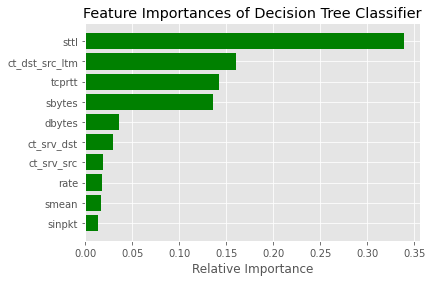

In [74]:
importances = DTclf.feature_importances_
indices = np.argsort(importances)
features = np.array(numerical_cols)
plt.title('Feature Importances of Decision Tree Classifier')
count = 10 # top # importance
plt.barh(range(count), importances[indices][len(indices)-count:], color='g', align='center')
plt.yticks(range(count), [features[i] for i in indices[len(indices)-count:]])
plt.xlabel('Relative Importance')
plt.show()

In [99]:
DTclf.feature_importances_

array([5.32579029e-03, 1.30571570e-03, 5.08050006e-04, 1.36322878e-01,
       3.58680859e-02, 1.77093917e-02, 3.38886239e-01, 0.00000000e+00,
       6.47131484e-03, 6.32565431e-03, 1.38626591e-03, 5.51881022e-04,
       1.38395199e-02, 4.08295334e-03, 2.94289016e-03, 2.63386038e-03,
       2.38653000e-04, 4.32763443e-03, 4.23094774e-03, 0.00000000e+00,
       1.42490629e-01, 6.19508524e-03, 4.44458691e-03, 1.67176175e-02,
       4.51145233e-03, 1.11604381e-03, 4.43909158e-03, 1.85304907e-02,
       2.10378387e-04, 8.23220112e-03, 6.81684854e-03, 6.13318608e-03,
       1.60339340e-01, 2.33872447e-05, 0.00000000e+00, 1.92697429e-03,
       5.44518371e-03, 2.94697780e-02, 0.00000000e+00])

#### In this case only the top 10 features are being used. The other features are not being used. Their importance is zero.

In [133]:
!pip install eli5

  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)


In [156]:
# Create Decision Tree classifer object
DTclf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
DTclf = DTclf.fit(X_train_transform, y2_train_transform)

#Predict the response for test dataset
y_pred = DTclf.predict(X_test_transform)

In [157]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test_transform, y_pred))

report=metrics.classification_report(y2_test_transform,y_pred)

DTclf_name=['Decision Tree Classifer','RegLog']

print('Reporting for %s:'%DTclf_name)

print(report)

Accuracy: 0.8510901614568184
Reporting for ['Decision Tree Classifer', 'RegLog']:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81     56000
           1       0.99      0.79      0.88    119341

    accuracy                           0.85    175341
   macro avg       0.84      0.88      0.84    175341
weighted avg       0.89      0.85      0.86    175341



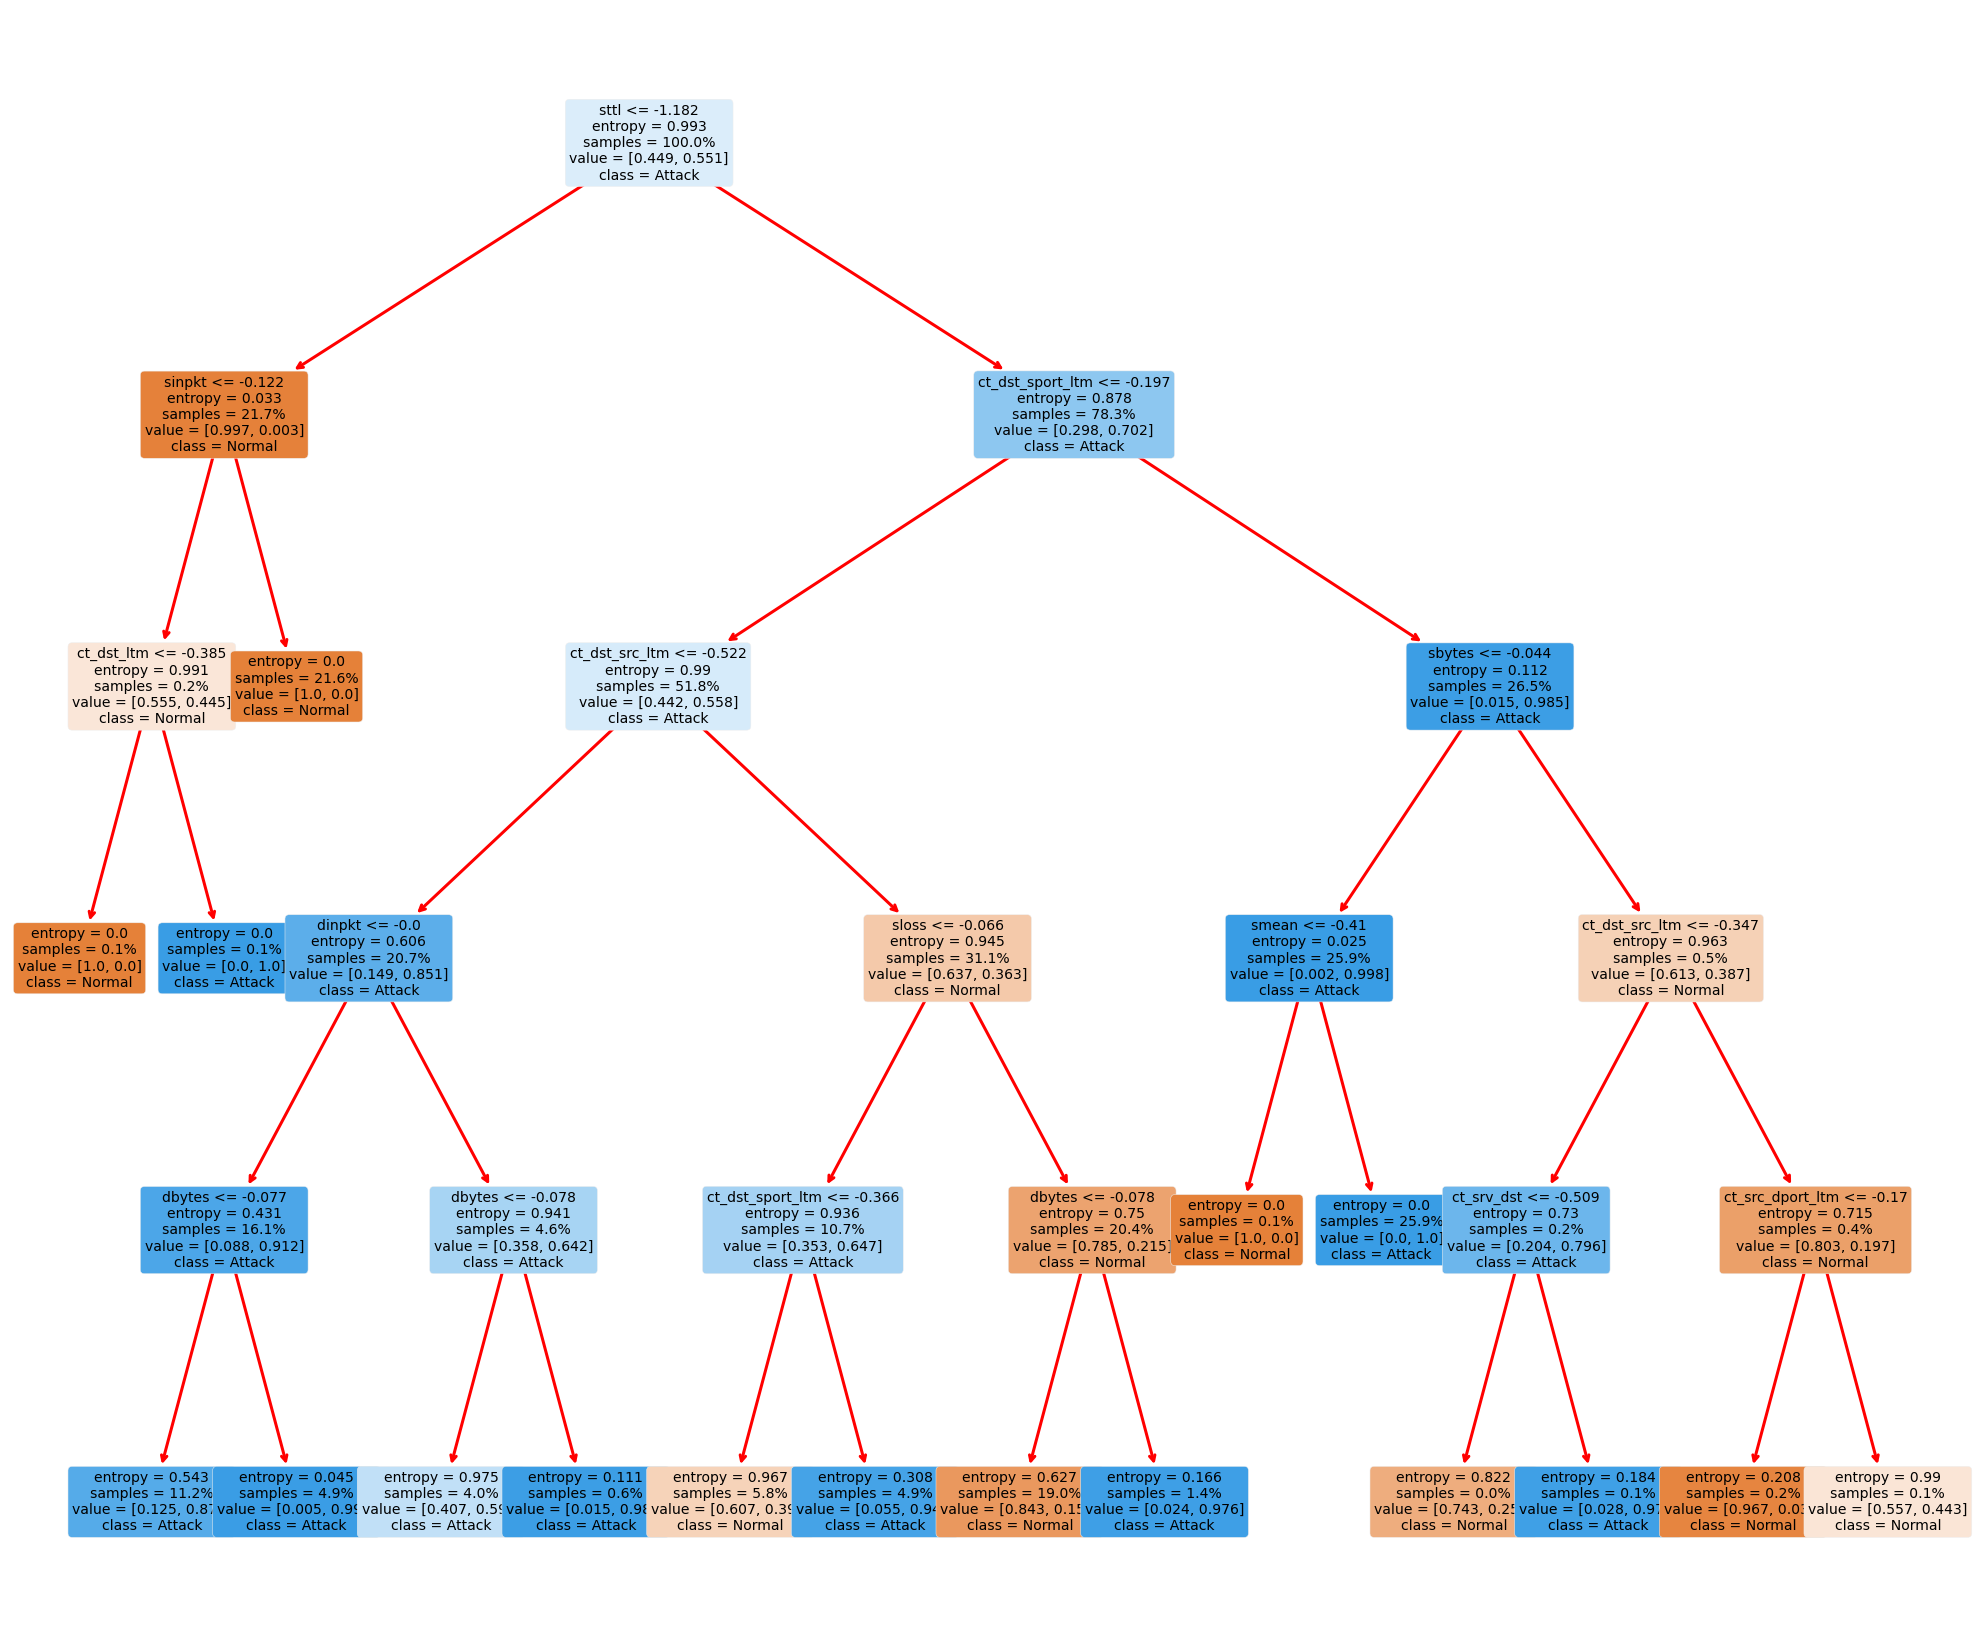

In [163]:
fig = plt.figure(figsize=(35, 30))
DTtree = tree.plot_tree(DTclf, feature_names = np.array(numerical_cols), class_names = ['Normal', 'Attack'], fontsize=14, proportion=True, filled=True, rounded=True)
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier XAI Visualization Part 2.png')

In [164]:
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(DTclf, random_state=1).fit(X_test_transform, y2_test_transform)
eli5.show_weights(perm, feature_names = np.array(numerical_cols))

#### Let us visualize the first three levels of the decision tree, max_depth=3, 5, 8

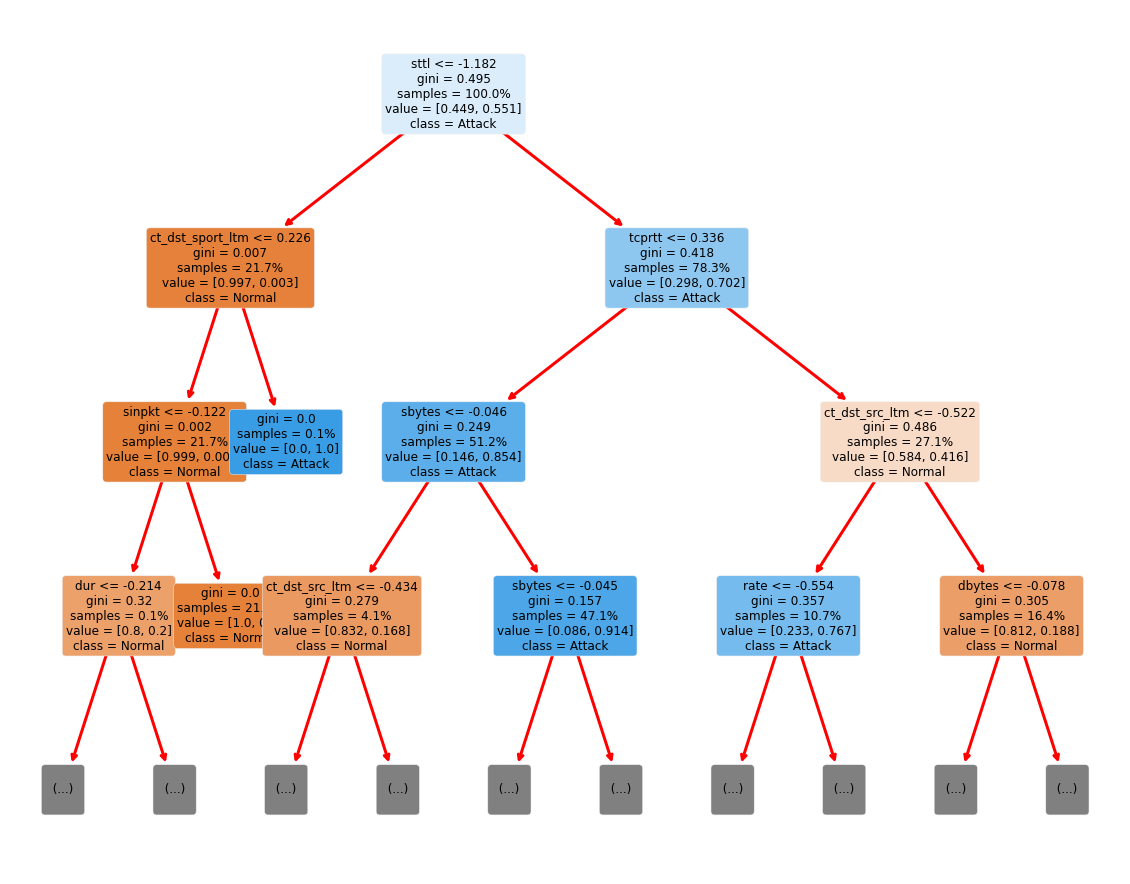

In [117]:
# visualization of DT Classfier
fig = plt.figure(figsize=(20, 16))
DTtree = tree.plot_tree(DTclf, feature_names = features, class_names = ['Normal', 'Attack'], fontsize=12, proportion=True, filled=True, rounded=True, max_depth=3) 
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier (Depth = 3 Nodes) Explainable AI Visualization.png')

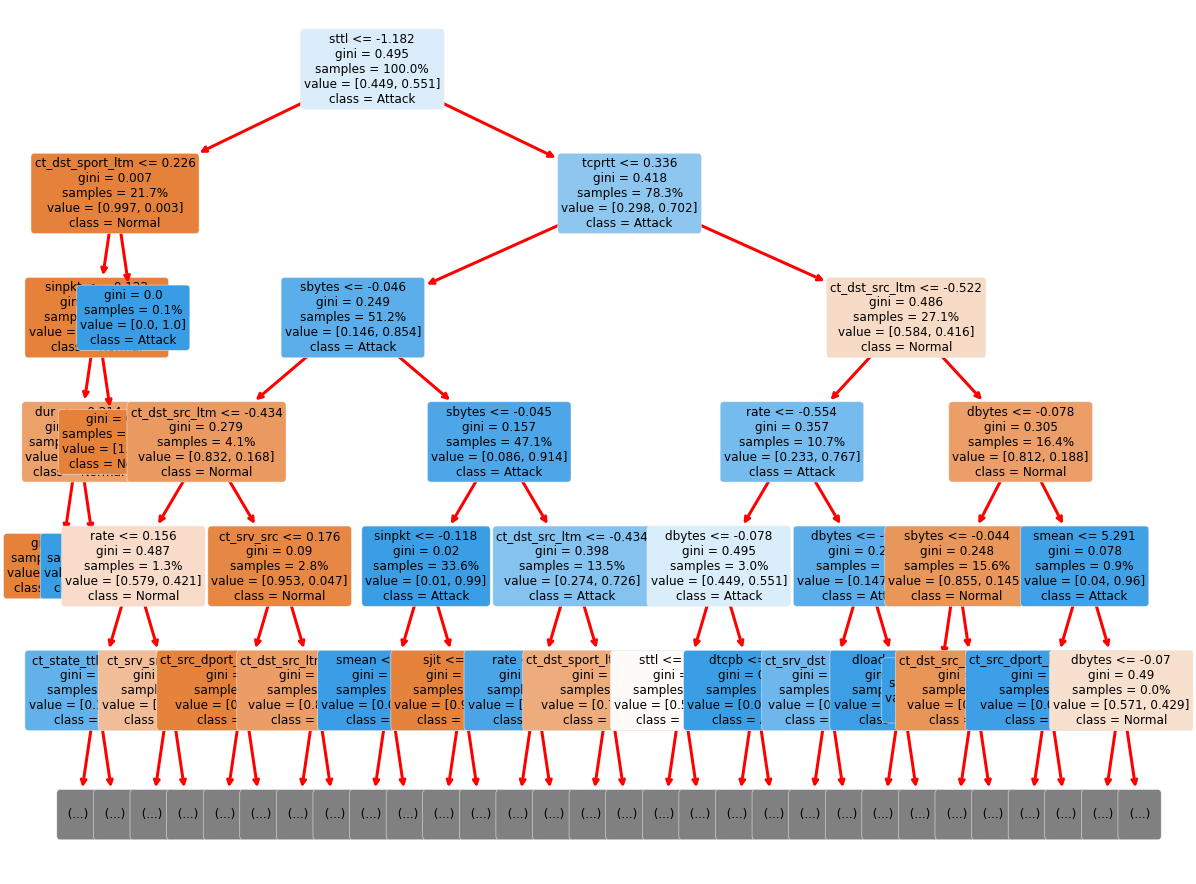

In [118]:
# visualization of DT Classfier
fig = plt.figure(figsize=(20, 16))
DTtree = tree.plot_tree(DTclf, feature_names = features, class_names = ['Normal', 'Attack'], fontsize=12, proportion=True, filled=True, rounded=True, max_depth=5) 
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier (Depth = 5 Nodes) Explainable AI Visualization.png')

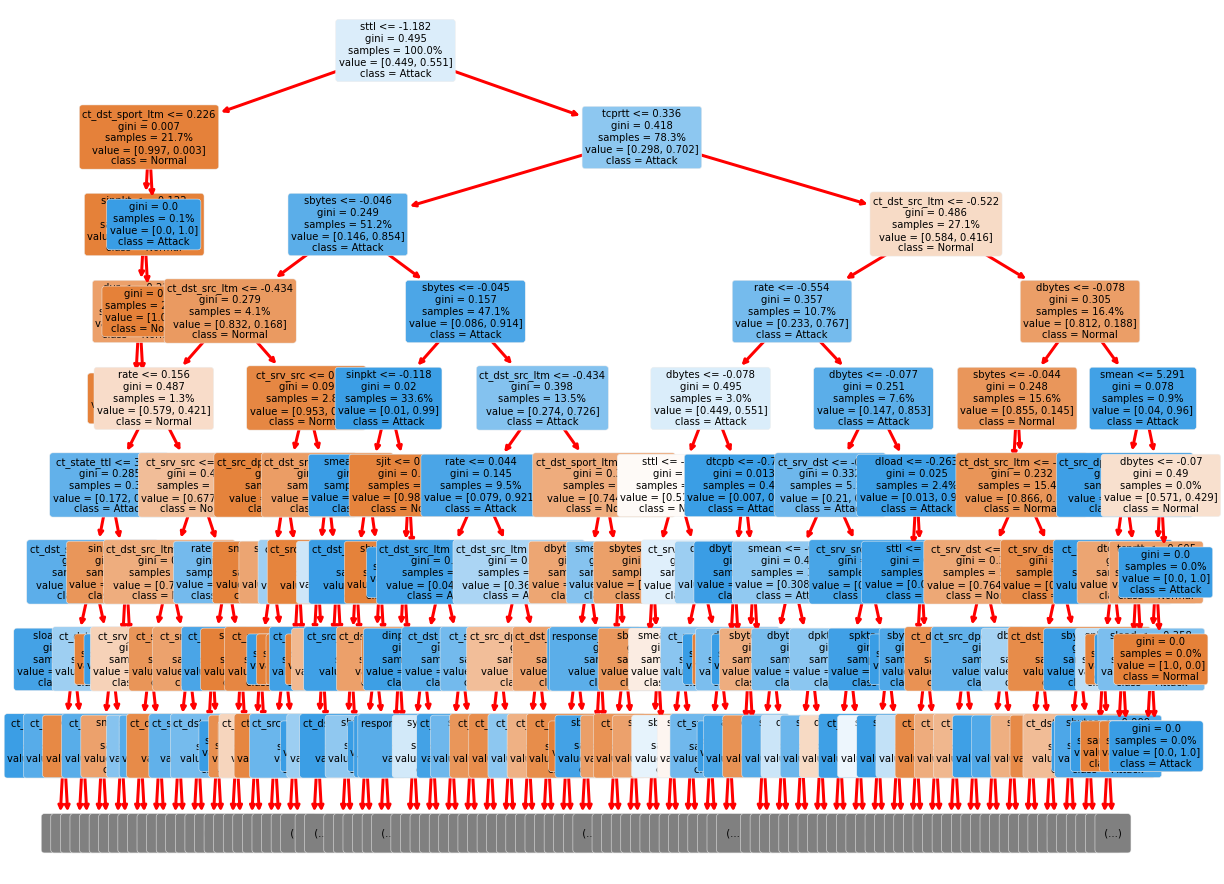

In [119]:
# visualization of DT Classfier
fig = plt.figure(figsize=(20, 16))
DTtree = tree.plot_tree(DTclf, feature_names = features, class_names = ['Normal', 'Attack'], fontsize=10, proportion=True, filled=True, rounded=True, max_depth=8) 
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier (Depth = 8 Nodes) Explainable AI Visualization.png')

### Model Performance On Testing Set:

In [122]:
# ===== Step 1: cross-validation ========
# define  Stratified 5-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

DTclf = tree.DecisionTreeClassifier()

# define metrics for evaluating
scoring = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro', 'roc_auc_ovr']  

# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=DTclf,
                            X=X_train_transform,
                            y=y2_train_transform,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) # prevent to show the train scores on cv splits.

In [123]:
cv_results

{'fit_time': array([0.79418993, 0.7741859 , 0.75815773, 0.77718639, 0.78616834]),
 'score_time': array([0.01799846, 0.0170033 , 0.0180037 , 0.01800418, 0.01900816]),
 'test_accuracy': array([0.96514241, 0.96745005, 0.96483663, 0.96538321, 0.96580833]),
 'test_precision_micro': array([0.96514241, 0.96745005, 0.96483663, 0.96538321, 0.96580833]),
 'test_recall_micro': array([0.96514241, 0.96745005, 0.96483663, 0.96538321, 0.96580833]),
 'test_f1_micro': array([0.96514241, 0.96745005, 0.96483663, 0.96538321, 0.96580833]),
 'test_roc_auc_ovr': array([0.96464484, 0.96701171, 0.96411713, 0.96498582, 0.96558506])}

In [124]:
cv_results['test_accuracy'].mean()

0.9657241273842143

In [125]:
# ======== Step 2: Evaluate the model using testing data =======

# fit the Logistic Regression model
DTclf.fit(X=X_train_transform, y=y2_train_transform)

# predition on testing data
y_pred_class = clf.predict(X=X_test_transform)
y_pred_score = clf.predict_proba(X=X_test_transform)[:, 1]

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y2_test_transform, y_score=y_pred_score)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y2_test_transform, y_pred=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y2_test_transform, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y2_test_transform, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y2_test_transform, y_pred=y_pred_class)

# print the above results
print('The model scores {:1.5f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.5f}'.format(precision_ontest))
print('The recall score on the test set: {:1.5f}'.format(recall_ontest))
print('Confusion Matrix:\n', cm_ontest)
# Print classification report:
print('Classification Report:\n', cls_report_ontest)

The model scores 0.96460 ROC AUC on the test set.
The precision score on the test set: 0.95925
The recall score on the test set: 0.85013
Confusion Matrix:
 [[ 51690   4310]
 [ 17886 101455]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82     56000
           1       0.96      0.85      0.90    119341

    accuracy                           0.87    175341
   macro avg       0.85      0.89      0.86    175341
weighted avg       0.89      0.87      0.88    175341



In [ ]:
import mysql.connector

# Establish a connection to the MySQL server
cnx = mysql.connector.connect(
    host="localhost",
    user="yourusername",
    password="yourpassword",
    database="yourdatabase"
)

# Create a cursor object
cursor = cnx.cursor()

# Define the INSERT statement
query = "INSERT INTO yourtable (column1, column2, column3) VALUES (%s, %s, %s)"

# Define the values to be inserted
values = ("value1", "value2", "value3")

# Execute the INSERT statement
cursor.execute(query, values)

# Commit the changes to the database
cnx.commit()

# Close the cursor and connection objects
cursor.close()
cnx.close()
